In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, f_oneway, kruskal # Numeric Vs Categorical
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import f

# Categorical Vs Categorical - Chisquared

Does gender affect online vs offline purchase?

In [3]:
observed = [
    [527, 72],
    [206, 102]
]

In [4]:
# H0: Gender and online/offline are not related
chi_stat, p_value, df, exp_freq = chi2_contingency(observed)
print(p_value, '\n')
print(exp_freq)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

4.268230756875865e-14 

[[484.08710033 114.91289967]
 [248.91289967  59.08710033]]
Reject H0


# Aerofit

In [5]:
df_aerofit = pd.read_csv("aerofit.csv")

In [6]:
df_aerofit.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
df_aerofit["Product"].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

## Gender Vs Income

<AxesSubplot:xlabel='Gender', ylabel='Income'>

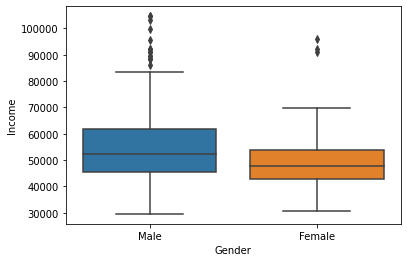

In [8]:
sns.boxplot(x='Gender', y='Income', data=df_aerofit) 

In [9]:
income_male = df_aerofit[df_aerofit["Gender"]=="Male"]["Income"]
income_female = df_aerofit[df_aerofit["Gender"]=="Female"]["Income"]

In [10]:
income_male.mean()

56562.75961538462

In [11]:
income_female.mean()

49828.90789473684

In [12]:
# H0: Gender and income are unrelated (mu1 = mu2)
ttest_ind(income_male, income_female)

Ttest_indResult(statistic=2.752488637540257, pvalue=0.006527263097214258)

In [13]:
print(income_male.mean(), income_male.std(), len(income_male))
print(income_female.mean(), income_female.std(), len(income_female))

56562.75961538462 18421.68777910902 104
49828.90789473684 12557.690427970298 76


In [14]:
ttest_ind_from_stats(
    income_male.mean(),
    income_male.std(),
    len(income_male),
    income_female.mean(),
    income_female.std(),
    len(income_female),
)

Ttest_indResult(statistic=2.752488637540257, pvalue=0.006527263097214258)

## Product Vs Income

<AxesSubplot:xlabel='Product', ylabel='Income'>

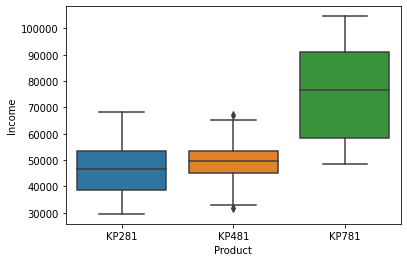

In [15]:
sns.boxplot(x='Product', y='Income', data=df_aerofit)

Is there a relation between product and income? Or are they independent

In [16]:
income_kp281 = df_aerofit[df_aerofit["Product"]=="KP281"]["Income"]
income_kp481 = df_aerofit[df_aerofit["Product"]=="KP481"]["Income"]
income_kp781 = df_aerofit[df_aerofit["Product"]=="KP781"]["Income"]

In [17]:
income_kp281.mean()

46418.025

In [18]:
income_kp481.mean()

48973.65

In [19]:
ttest_ind(income_kp281, income_kp481)

Ttest_indResult(statistic=-1.6817688139914835, pvalue=0.09487529747264932)

In [20]:
# H0: All three have same mean
# Ha: Atleast one is different from others
f_stat, p_value = f_oneway(income_kp281, income_kp481, income_kp781) 
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

Reject H0


## Gender Vs Product

In [21]:
gender_product = pd.crosstab(index=df_aerofit['Gender'],columns=df_aerofit['Product'])

In [22]:
gender_product

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


In [23]:
# H0: Gender does not effect product
# Ha: Gender effects product
chi_stat, p_value, dof, expected = chi2_contingency(gender_product)
print(expected)
print(p_value)
if p_value < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

[[33.77777778 25.33333333 16.88888889]
 [46.22222222 34.66666667 23.11111111]]
0.0015617972833158714
Reject H0


In [24]:
chi2_contingency([[40, 29], [40, 31]])

Chi2ContingencyResult(statistic=0.0005953595971967067, pvalue=0.9805335549105975, dof=1, expected_freq=array([[39.42857143, 29.57142857],
       [40.57142857, 30.42857143]]))

# IPhone sales - ANOVA from scratch

In [25]:
a = [25, 25, 27, 30, 23, 20]
b = [30, 30, 21, 24, 26, 28]
c = [18, 30, 29, 29, 24, 26]

In [26]:
f_stat, p_value = f_oneway(a,b,c) 
print(f_stat, p_value)

0.2348993288590604 0.793504662732833


In [27]:
list_of_tuples = list(zip(a, b,c))
df = pd.DataFrame(list_of_tuples, columns = ['A', 'B', 'C'])
df

,A,B,C
0,25,30,18
1,25,30,30
2,27,21,29
3,30,24,29
4,23,26,24
5,20,28,26


In [28]:
m1 = np.mean(a)
m2 = np.mean(b)
m3 = np.mean(c)

print('Average sales for A: {}'.format(m1))
print('Average sales for B: {}'.format(m2))
print('Average sales for C: {}'.format(m3))

Average sales for A: 25.0
Average sales for B: 26.5
Average sales for C: 26.0


In [29]:
m = (m1+m2+m3)/3 
print('Overall mean: {}'.format(m)) 

Overall mean: 25.833333333333332


In [30]:
SSb = 6*((m1-m)**2+(m2-m)**2+(m3-m)**2)
print('Between-groups Sum of Squared Differences: {}'.format(SSb))

Between-groups Sum of Squared Differences: 6.999999999999999


In [31]:
MSb = SSb/2
print('Between-groups Mean Square value: {}'.format(MSb))

Between-groups Mean Square value: 3.4999999999999996


In [32]:
err_a = list(a-m1)
err_b = list(b-m2)
err_c = list(c-m3)
err = err_a+err_b+err_c
ssw = []
for i in err:
    ssw.append(i**2)
    
SSw = np.sum(ssw)

In [33]:
MSw = SSw/15
print('Within-group Mean Square value: {}'.format(MSw))

Within-group Mean Square value: 14.9


In [34]:
F = MSb/MSw
print('F-score: {}'.format(F))

F-score: 0.23489932885906037


In [35]:
1 - f.cdf(F, dfn=2, dfd=15)

0.7935046627328333

In [36]:
f_stat, p_value = f_oneway(a,b,c) 
print(f_stat, p_value)

0.2348993288590604 0.793504662732833


In [37]:
# If assumptions of ANOVA don't hold, we need Kruskal Wallis
kruskal(a, b, c)

KruskalResult(statistic=0.6794066317626576, pvalue=0.7119815250421468)